## Imports

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sn #necessary to create correlation matrix

In [2]:
df = pd.read_excel('./data/fluxo_escolar_normalizado.xlsx')

## Normalizing counties

In [3]:
unique_county_values = df['municipio'].unique().tolist()
sp_counties_df = pd.read_excel('data/ibge_sp_counties_data.xlsx')
sp_counties_list = sp_counties_df.loc[:, 'Município'].tolist()

import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

sp_counties_normalized_list = [ strip_accents(i).replace(';', '').upper() for i in sp_counties_list]

diff1 = set(sp_counties_normalized_list).difference(set(unique_county_values))
diff2 = set(unique_county_values).difference(set(sp_counties_normalized_list))

print(f'''Comparing results:\n
sp_counties_normalized_list values that do not in unique_county_values: {diff1 or None}
unique_county_values values that do not in sp_counties_normalized_list: {diff2 or None}''')

Comparing results:

sp_counties_normalized_list values that do not in unique_county_values: {'SANTANA DE PARNAIBA', 'BIRITIBA MIRIM'}
unique_county_values values that do not in sp_counties_normalized_list: {'BIRITIBA-MIRIM', 'MOGI-MIRIM', 'MOGI-GUACU'}


### Applying county name corrections base on comparing above

In [4]:
df['municipio'] = df['municipio'].replace('BIRITIBA-MIRIM', 'BIRITIBA MIRIM')
df['municipio'] = df['municipio'].replace('MOGI-GUACU', 'MOGI GUACU')
df['municipio'] = df['municipio'].replace('MOGI-MIRIM', 'MOGI MIRIM')
# Note: 'SANTANA DE PARNAIBA' is a county that is not in case study dataframe

df.drop(columns=['Unnamed: 0'])
df
# df.to_excel('output/fluxo_escolar_county_correction.xlsx')

,Unnamed: 0,index,ano,municipio,id_rede_ensino,id_escola,escola,aprovado,reprovado,abandono,aprovado_normalized,reprovado_normalized,abandono_normalized
0,0,1,2013,SAO PAULO,1,24,GAVIAO PEIXOTO BRIGADEIRO,6.362740e+09,3.449975e+09,1.872844e+09,1.009562e-02,1.029664e-02,5.551984e-03
1,1,2,2013,SAO PAULO,1,36,JOAO SOLIMEO,6.689240e+09,2.106847e+09,1.203913e+09,1.061368e-02,6.288000e-03,3.568960e-03
2,2,3,2013,SAO PAULO,1,48,WALFREDO ARANTES CALDAS PROFESSOR,7.436802e+08,2.069371e+09,4.938272e+09,1.179982e-03,6.176150e-03,1.463934e-02
3,3,7,2013,SAO PAULO,1,97,RENATO DE ARRUDA PENTEADO PROFESSOR,8.795309e+09,1.172708e+09,1.087420e+09,1.395533e-02,3.500010e-03,3.223621e-03
4,4,11,2013,SAO PAULO,1,139,MARIANO DE OLIVEIRA PROFESSOR,6.358839e+09,2.963940e+09,6.772208e+09,1.008943e-02,8.846040e-03,2.007599e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51970,53590,56481,2012,JUNDIAI,1,20407,DIOGENES DUARTE PAES,7.931000e+01,1.336000e+01,7.330000e+00,1.258395e-10,3.987364e-11,2.172954e-11
51971,53591,56482,2012,LIMEIRA,1,20408,JOSE MARCILIANO DA COSTA JUNIOR PROFESSOR,7.250000e+01,1.125000e+01,1.625000e+01,1.150342e-10,3.357623e-11,4.817259e-11
51972,53592,56483,2012,LEME,1,20411,MARIA JOAQUINA DE ARRUDA PROFESSORA,8.270000e+01,1.317000e+01,4.130000e+00,1.312183e-10,3.930658e-11,1.224325e-11
51973,53593,56484,2012,APIAI,1,20301,AMBROSINA DE OLIVEIRA MATTOS PROFA,9.823000e+01,1.770000e+00,0.000000e+00,1.558595e-10,5.282661e-12,0.000000e+00


### Creating a Correlation Matrix

/var/folders/44/zxd8k2956zv46rm94c14kn2h0000gn/T/ipykernel_48281/2688694734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

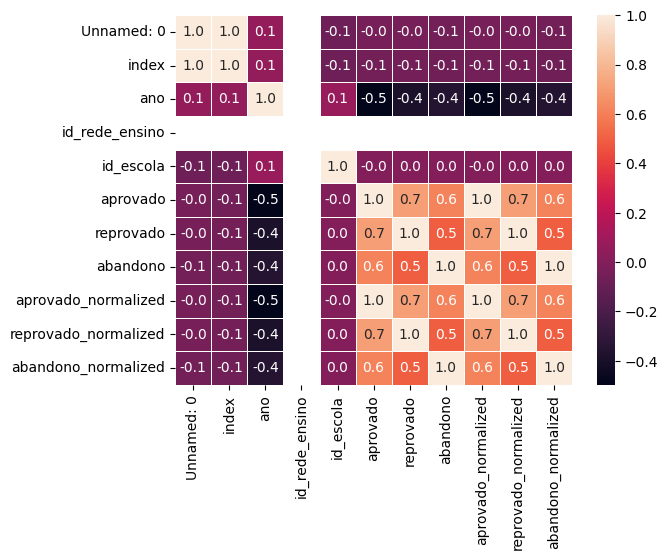

In [5]:
# correlation analysis
correlation = df.corr()

# correlation matrix plot
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot